### 时序差分算法

#### 问题定义
悬崖漫步是一个非常经典的强化学习环境，它要求一个智能体从起点出发，避开悬崖行走，最终到达目标位置。如图 4-1 所示，有一个 4×12 的网格世界，每一个网格表示一个状态。智能体的起点是左下角的状态，目标是右下角的状态，智能体在每一个状态都可以采取 4 种动作：上、下、左、右。如果智能体采取动作后触碰到边界墙壁则状态不发生改变，否则就会相应到达下一个状态。环境中有一段悬崖，智能体掉入悬崖或到达目标状态都会结束动作并回到起点，也就是说掉入悬崖或者达到目标状态是终止状态。智能体每走一步的奖励是 −1，掉入悬崖的奖励是 −100。

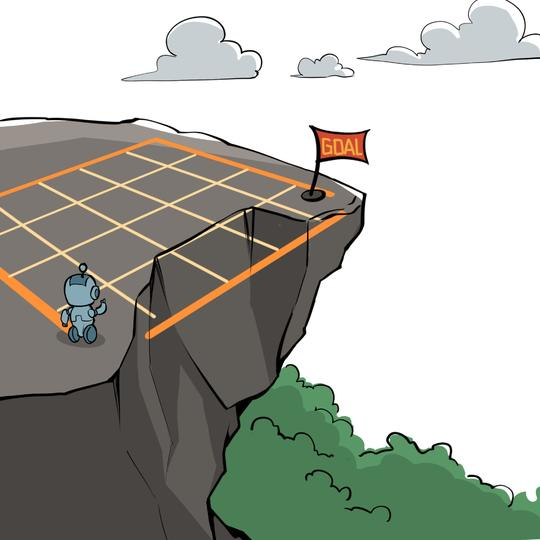

#### 调入库

In [1]:
import gym
import matplotlib.pyplot as plt 
import numpy as np
from tqdm import tqdm  # tqdm是显示循环进度条的库
from RL_algo.model_free.value_based import TD_learning_table as TD


#### 创建环境及参数

In [2]:
env=gym.make("CliffWalking-v0")
nrow = env.unwrapped.shape[0]
ncol = env.unwrapped.shape[1]
np.random.seed(3)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
s_num = nrow*ncol
n_action = env.action_space.n

#### Sarsa算法

算法主体：

$$q_{t+1}(s_{t},a_{t})=q_{t}(s_{t},a_{t})-\alpha_{t}(s_{t},a_{t})\Big[q_{t}(s_{t},a_{t})-(r_{t+1}+\gamma q_{t}(s_{t+1},a_{t+1}))\Big],$$
$$q_{t+1}(s,a)=q_t(s,a),\quad\text{for all }(s,a)\neq(s_t,a_t),$$

伪代码
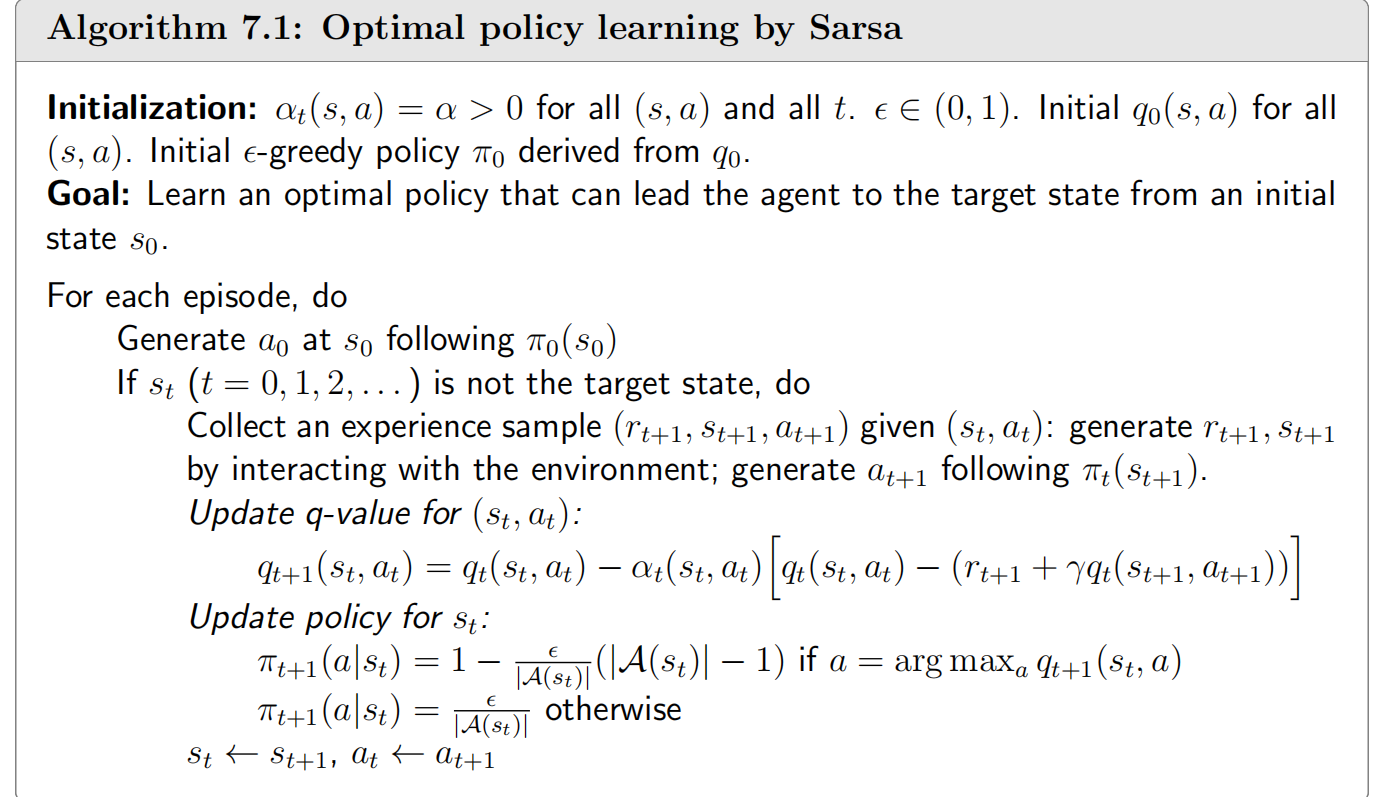

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 2799.94it/s, episode=500, return=-19.600]


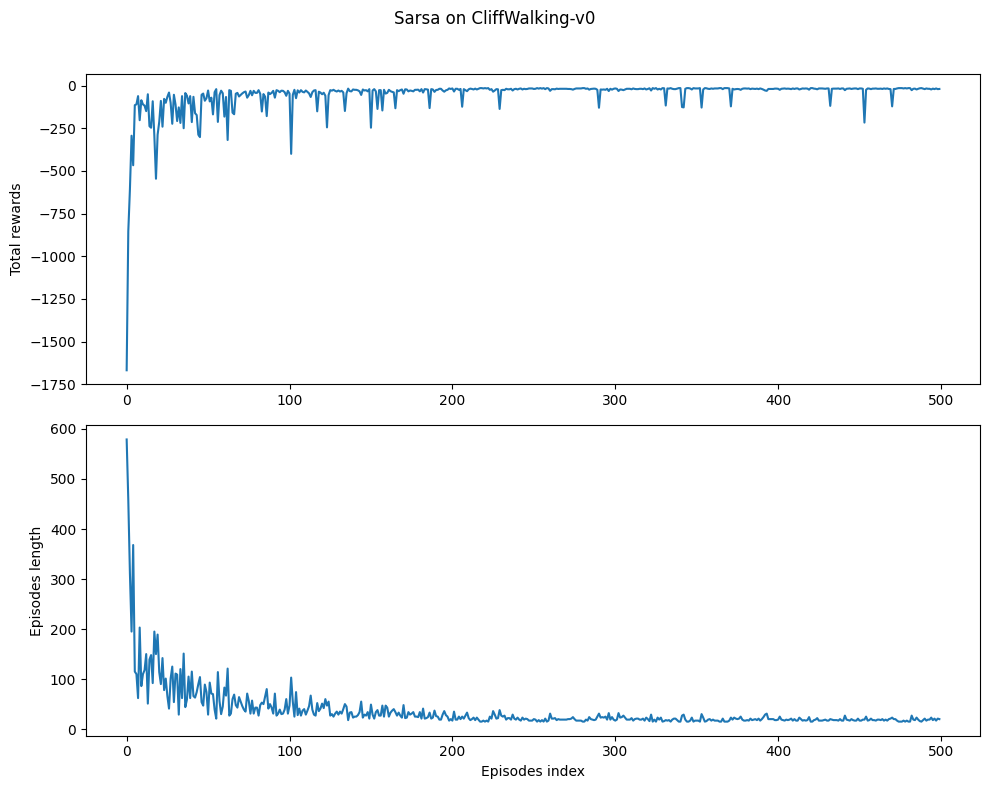

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Sarsa算法最终收敛得到的策略为：
o→oo o→oo o→oo o→oo o→oo o→oo o→oo oo↓o o→oo o→oo o→oo oo↓o 
↑ooo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo oo↓o 
↑ooo ↑ooo ↑ooo ooo← ↑ooo o→oo ooo← ↑ooo ↑ooo ↑ooo o→oo oo↓o 
↑ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [3]:
num_episodes = 500  # 智能体在环境中运行的序列的数量
agent_Sarsa = TD.Sarsa(epsilon, alpha, gamma,s_num,n_action,env,num_episodes)
agent_Sarsa.run_Sarsa()
# 打印最优的策略
def print_agent(agent_Sarsa, action_meaning, disaster=[], end=[]):
    for i in range(nrow):
        for j in range(ncol):
            if (i * ncol + j) in disaster:
                print('****', end=' ')
            elif (i * ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent_Sarsa.best_action(i * ncol + j)
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()


action_meaning = ['↑', '→', '↓', '←']
env.render()
print('Sarsa算法最终收敛得到的策略为：')
print_agent(agent_Sarsa, action_meaning, list(range(37, 47)), [47])

#### Expected Sarsa

相比于Sarsa，只对Q table 的更新方式做了改变，即
$$q_{t+1}(s_t,a_t)=q_t(s_t,a_t)-\alpha_t(s_t,a_t)\Big[q_t(s_t,a_t)-(r_{t+1}+\gamma\mathbb{E}[q_t(s_{t+1},A)])\Big],\\q_{t+1}(s,a)=q_t(s,a),\quad\text{for all }(s,a)\neq(s_t,a_t),\\\text{where}\\\mathbb{E}[q_t(s_{t+1},A)]=\sum_a\pi_t(a|s_{t+1})q_t(s_{t+1},a)\doteq v_t(s_{t+1})$$

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 2056.60it/s, episode=500, return=-21.200]


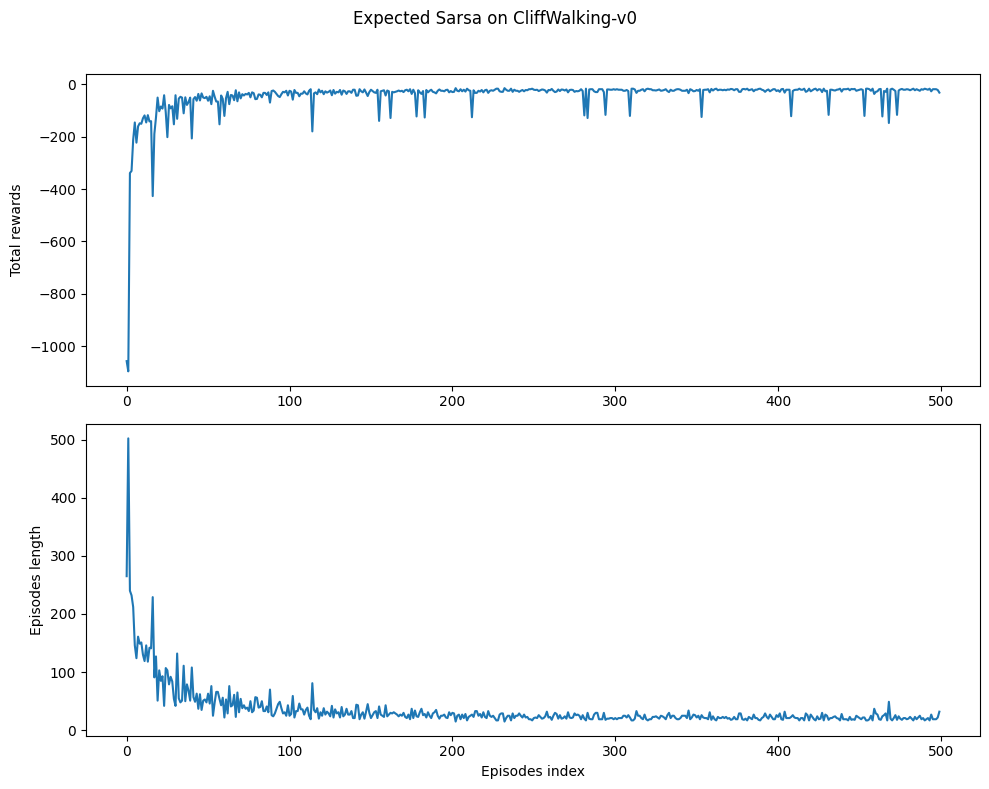

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Expected Sarsa算法最终收敛得到的策略为：
o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo oo↓o 
↑ooo ↑ooo o→oo o→oo o→oo o→oo ↑ooo o→oo o→oo o→oo o→oo oo↓o 
↑ooo o→oo ↑ooo ↑ooo ↑ooo o→oo ↑ooo ooo← ↑ooo ooo← ↑ooo oo↓o 
↑ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [4]:
num_episodes = 500  # 智能体在环境中运行的序列的数量
agent_ex_Sarsa = TD.Expected_Sarsa(epsilon, alpha, gamma,s_num,n_action,env,num_episodes)
agent_ex_Sarsa.run_Expected_Sarsa()
# 打印最优的策略
def print_agent(agent_ex_Sarsa, action_meaning, disaster=[], end=[]):
    for i in range(nrow):
        for j in range(ncol):
            if (i * ncol + j) in disaster:
                print('****', end=' ')
            elif (i * ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent_ex_Sarsa.best_action(i * ncol + j)
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()


action_meaning = ['↑', '→', '↓', '←']
env.render()
print('Expected Sarsa算法最终收敛得到的策略为：')
print_agent(agent_ex_Sarsa , action_meaning, list(range(37, 47)), [47])

#### n step Sarsa

$$\begin{aligned}q_{t+1}(s_t,a_t)&=q_t(s_t,a_t)\\&-\alpha_t(s_t,a_t)\Big[q_t(s_t,a_t)-\big(r_{t+1}+\gamma r_{t+2}+\cdots+\gamma^nq_t(s_{t+n},a_{t+n})\big)\Big].\end{aligned}$$

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 2915.99it/s, episode=500, return=-19.800]


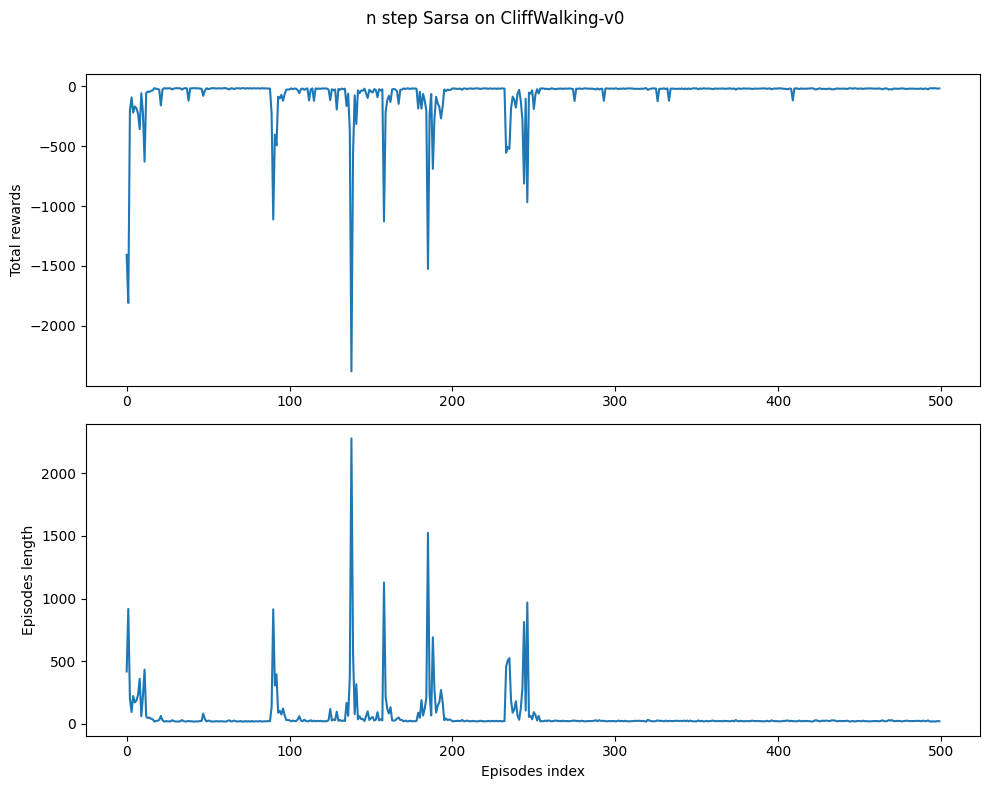

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

n step Sarsa算法最终收敛得到的策略为：
o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo oo↓o o→oo o→oo oo↓o 
↑ooo ↑ooo ↑ooo ↑ooo ↑ooo o→oo o→oo o→oo o→oo ↑ooo oo↓o oo↓o 
↑ooo ooo← ooo← o→oo ooo← ↑ooo ooo← o→oo ↑ooo ↑ooo o→oo oo↓o 
↑ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [5]:
num_episodes = 500  # 智能体在环境中运行的序列的数量
n_step = 5  # 5步Sarsa算法
agent_nstep_Sarsa = TD.nstep_Sarsa(epsilon, alpha, gamma,n_step,s_num,n_action,env,num_episodes)
agent_nstep_Sarsa.run_nstep_Sarsa()
# 打印最优的策略
def print_agent(agent_nstep_Sarsa, action_meaning, disaster=[], end=[]):
    for i in range(nrow):
        for j in range(ncol):
            if (i * ncol + j) in disaster:
                print('****', end=' ')
            elif (i * ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent_nstep_Sarsa.best_action(i * ncol + j)
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()


action_meaning = ['↑', '→', '↓', '←']
env.render()
print('n step Sarsa算法最终收敛得到的策略为：')
print_agent(agent_nstep_Sarsa, action_meaning, list(range(37, 47)), [47])

#### Q learning off policy
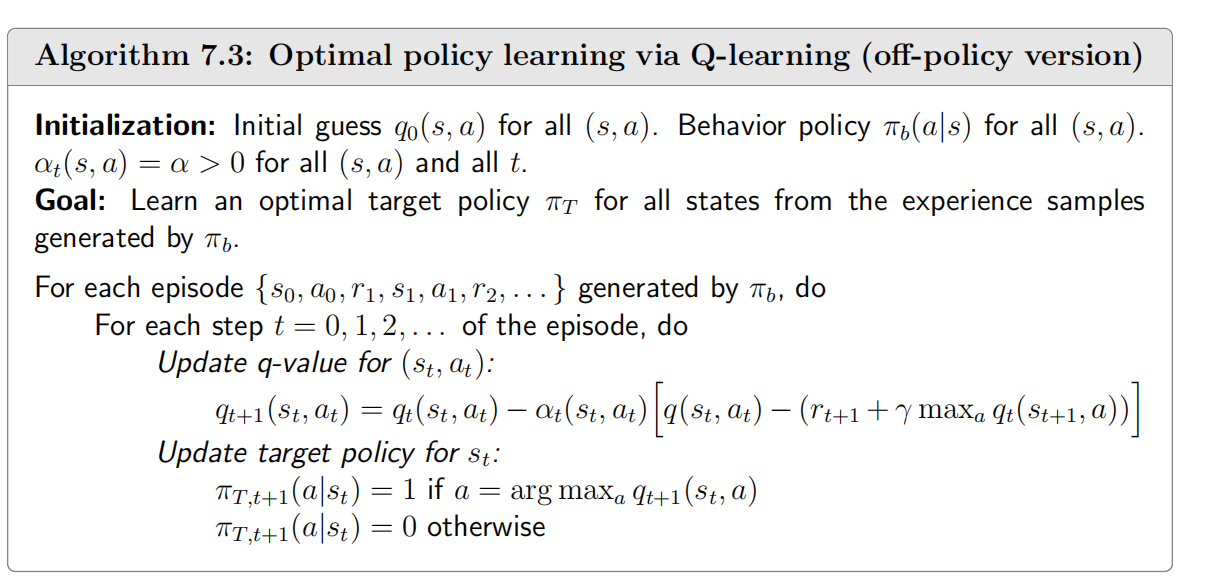

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 3658.80it/s, episode=500, return=-56.100]


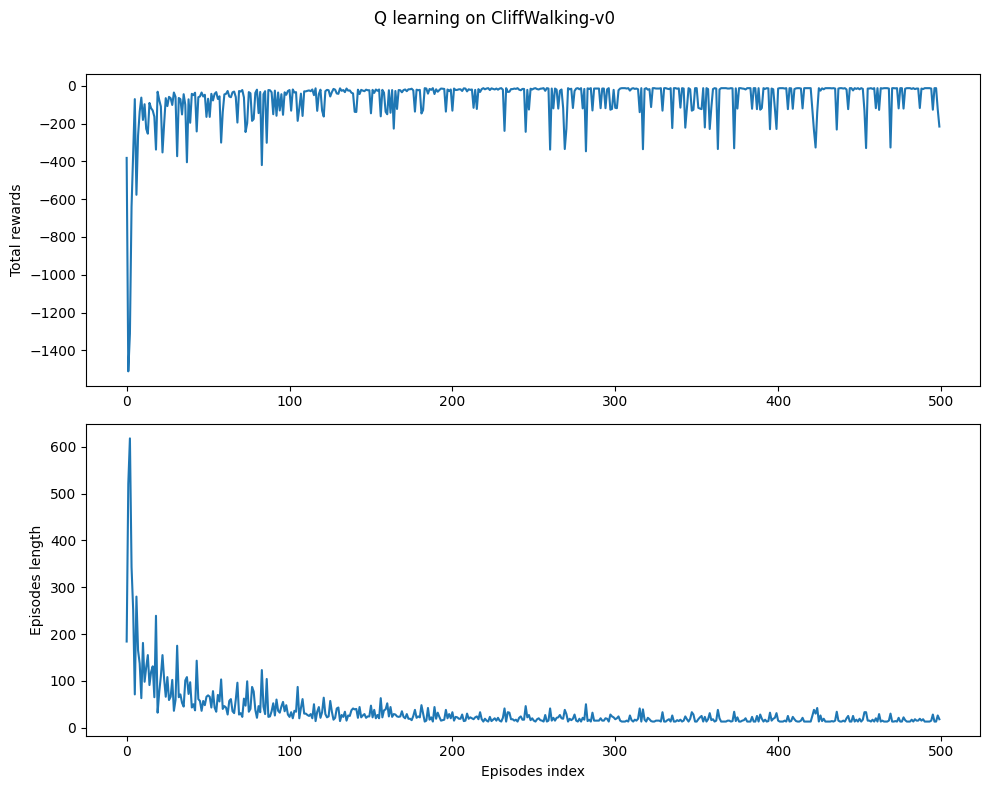

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Q learning算法最终收敛得到的策略为：
↑ooo oo↓o o→oo o→oo oo↓o o→oo o→oo o→oo o→oo oo↓o ↑ooo oo↓o 
ooo← oo↓o ↑ooo ↑ooo ooo← o→oo o→oo o→oo ooo← oo↓o o→oo oo↓o 
o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo oo↓o 
↑ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [6]:
num_episodes = 500  # 智能体在环境中运行的序列的数量
agent_Q_learning = TD.Q_learning(epsilon,alpha, gamma,s_num,n_action,env,num_episodes)
agent_Q_learning.run_Q_learning()
# 打印最优的策略
def print_agent(agent_Q_learning, action_meaning, disaster=[], end=[]):
    for i in range(nrow):
        for j in range(ncol):
            if (i * ncol + j) in disaster:
                print('****', end=' ')
            elif (i * ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent_Q_learning.best_action(i * ncol + j)
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()


action_meaning = ['↑', '→', '↓', '←']
env.render()
print('Q learning算法最终收敛得到的策略为：')
print_agent(agent_Q_learning , action_meaning, list(range(37, 47)), [47])